## Case 1:

Adapt the code from the Supervised Learning using the SKLearn Library  to train a logistic regression and a perceptron classifier on the new data set below.

This data set contains person-level data from a digitized image of a fine needle aspirate of a breast mass for people with suspected breast cancer. Researchers then measured 11 features of the image. The aim is to predict patient diagnosis. Features of the dataset are:

   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

More details of the dataset are available at: https://archive-beta.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+diagnostic

**Results**


**benign or malignant, denoted by 2 or 4 in the output label**

Using a train/test split of 70/30, calculate the mean and standard deviation of each feature that will be used in the standard scalar
**means: array([4.41513292, 3.22290389, 3.26380368, 2.8200409 , 3.23108384,
       3.58125   , 3.44580777, 2.91411043, 1.62781186])**


# Data Import

The data for this exercise is imported below. Note that some of the variables are categorical, and will need to be one-hot encoded. Other variables are dates. One option, for instance, is to convert sym_on and hosp_vis into a single variable - days between onset of symptoms and hospitalisation. This changes the variable from a date to a number.

In [4]:
# data import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('breast-cancer-wisconsin.csv', header = None, na_values='?')
y = data.iloc[:,10]
X = data.iloc[:,1:10]

In [6]:
X

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [13]:
# models that will be used in this exercise
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

# Data impution

In [8]:
 X.isna().sum()

1     0
2     0
3     0
4     0
5     0
6    16
7     0
8     0
9     0
dtype: int64

In [9]:
cols = [6]
X[cols]=X[cols].fillna(X.mode().iloc[0])
X.head

<bound method NDFrame.head of      1   2   3  4  5     6   7   8  9
0    5   1   1  1  2   1.0   3   1  1
1    5   4   4  5  7  10.0   3   2  1
2    3   1   1  1  2   2.0   3   1  1
3    6   8   8  1  3   4.0   3   7  1
4    4   1   1  3  2   1.0   3   1  1
..  ..  ..  .. .. ..   ...  ..  .. ..
694  3   1   1  1  3   2.0   1   1  1
695  2   1   1  1  2   1.0   1   1  1
696  5  10  10  3  7   3.0   8  10  2
697  4   8   6  4  3   4.0  10   6  1
698  4   8   8  5  4   5.0  10   4  1

[699 rows x 9 columns]>

# How many classes are you trying to predict?

In [14]:
# Decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_acc = cross_val_score(dt_clf, X, y, cv=5)
dt_sen = cross_val_score(dt_clf, X, y, cv=5, scoring=make_scorer(recall_score, pos_label=1, average='macro'))

# Random forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_acc = cross_val_score(rf_clf, X, y, cv=5)
rf_sen = cross_val_score(rf_clf, X, y, cv=5, scoring=make_scorer(recall_score, pos_label=1, average='macro'))

# Report accuracy and sensitivity
print("Decision tree accuracy:", np.mean(dt_acc))
print("Decision tree sensitivity:", np.mean(dt_sen))
print("Random forest accuracy:", np.mean(rf_acc))
print("Random forest sensitivity:", np.mean(rf_sen))

Decision tree accuracy: 0.9327749229188079
Decision tree sensitivity: 0.9241259129069688
Random forest accuracy: 0.965704008221994
Random forest sensitivity: 0.9620840727595386


# Using a train/test split of 70/30, calculate the mean and standard deviation of each feature that will be used in the standard scalar?

In [16]:
# import models
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import cross_validate


# create logistic regression and perceptron objects
lr = LogisticRegression()
pt = Perceptron()

# perform 5-fold cross-validation on logistic regression and perceptron models
lr_scores = cross_validate(lr, X, y, cv=5, scoring=['accuracy', 'recall_macro'])
pt_scores = cross_validate(pt, X, y, cv=5, scoring=['accuracy', 'recall_macro'])

# print the mean accuracy and sensitivity (recall macro) scores for each model
print('Logistic Regression - Mean Accuracy:', np.mean(lr_scores['test_accuracy']))
print('Logistic Regression - Mean Sensitivity:', np.mean(lr_scores['test_recall_macro']))
print('Perceptron - Mean Accuracy:', np.mean(pt_scores['test_accuracy']))
print('Perceptron - Mean Sensitivity:', np.mean(pt_scores['test_recall_macro']))

Logistic Regression - Mean Accuracy: 0.9642548818088386
Logistic Regression - Mean Sensitivity: 0.9589618456078084
Perceptron - Mean Accuracy: 0.9642548818088386
Perceptron - Mean Sensitivity: 0.964861755739085


# What is the sensitivity and specificity of your classifiers?

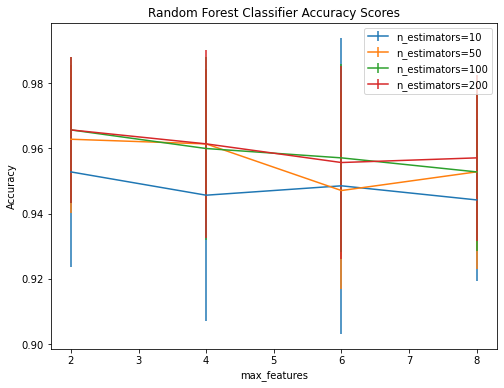

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define a range of n_estimators and max_features values to try
n_estimators_range = [10, 50, 100, 200]
max_features_range = [2, 4, 6, 8]

# Initialize empty lists to store the results
mean_accuracy_scores = []
std_accuracy_scores = []

# Loop through each combination of parameters
for n_estimators in n_estimators_range:
    accuracy_scores = []
    for max_features in max_features_range:
        # Create a random forest classifier with the current parameters
        rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)
        
        # Perform 5-fold cross validation and calculate the accuracy scores
        accuracy_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
        
        # Append the mean and standard deviation of the accuracy scores to the lists
        mean_accuracy_scores.append(np.mean(accuracy_scores))
        std_accuracy_scores.append(np.std(accuracy_scores))

# Plot the mean accuracy scores for each combination of parameters
plt.figure(figsize=(8, 6))
for i in range(len(n_estimators_range)):
    plt.errorbar(max_features_range, mean_accuracy_scores[i*len(max_features_range):(i+1)*len(max_features_range)], 
                 yerr=std_accuracy_scores[i*len(max_features_range):(i+1)*len(max_features_range)], label='n_estimators='+str(n_estimators_range[i]))
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy Scores')
plt.legend()
plt.show()

# Another way

In [20]:
# tinker with n_estimators
estimators = np.arange(1,20,1)
scoring = {'acc':'accuracy', 'sens':'recall_macro'}

total_scores = [];
for i, est in enumerate(estimators):
    model1 = RandomForestClassifier(n_estimators = est)
    scores1 = cross_validate(model1, X, y, cv=5, scoring = scoring, return_train_score = True) # this gives the accuracy
    total_scores.append(scores1['test_acc'].mean())
print(total_scores)

[0.928540596094553, 0.9069784172661871, 0.9470606372045222, 0.9370914696813978, 0.9542651593011305, 0.9470914696813978, 0.9556628982528264, 0.9470914696813978, 0.9528263103802672, 0.9528365878725591, 0.9628160328879753, 0.9499177800616649, 0.9542548818088387, 0.9528365878725591, 0.9556834532374101, 0.9585405960945529, 0.9585508735868448, 0.9571223021582733, 0.9556834532374101]


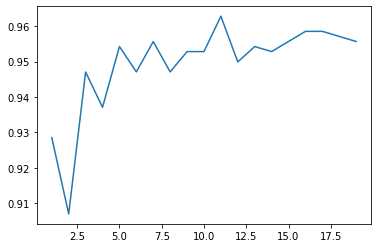

In [21]:
plt.plot(estimators, total_scores)

In [22]:
# tinker with max_features

n_features = np.arange(1,10,1) # try 1 to 10 features for each tree

total_scores = [];
for i, est in enumerate(n_features):
    model1 = RandomForestClassifier(max_features = est)
    scores1 = cross_validate(model1, X, y, cv=5, scoring = scoring, return_train_score = True) # this gives the accuracy
    total_scores.append(scores1['test_acc'].mean())
print(total_scores)

[0.9685508735868448, 0.9671325796505652, 0.9599794450154162, 0.9571223021582733, 0.9542548818088387, 0.9542548818088387, 0.9513977389516958, 0.9542651593011305, 0.9528365878725591]


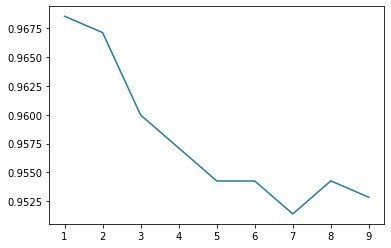

In [23]:
plt.plot(n_features, total_scores)